<a href="https://colab.research.google.com/github/alvillegasru/Proyeccion_Energia/blob/main/Cuaderno/ProyeccionDemanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

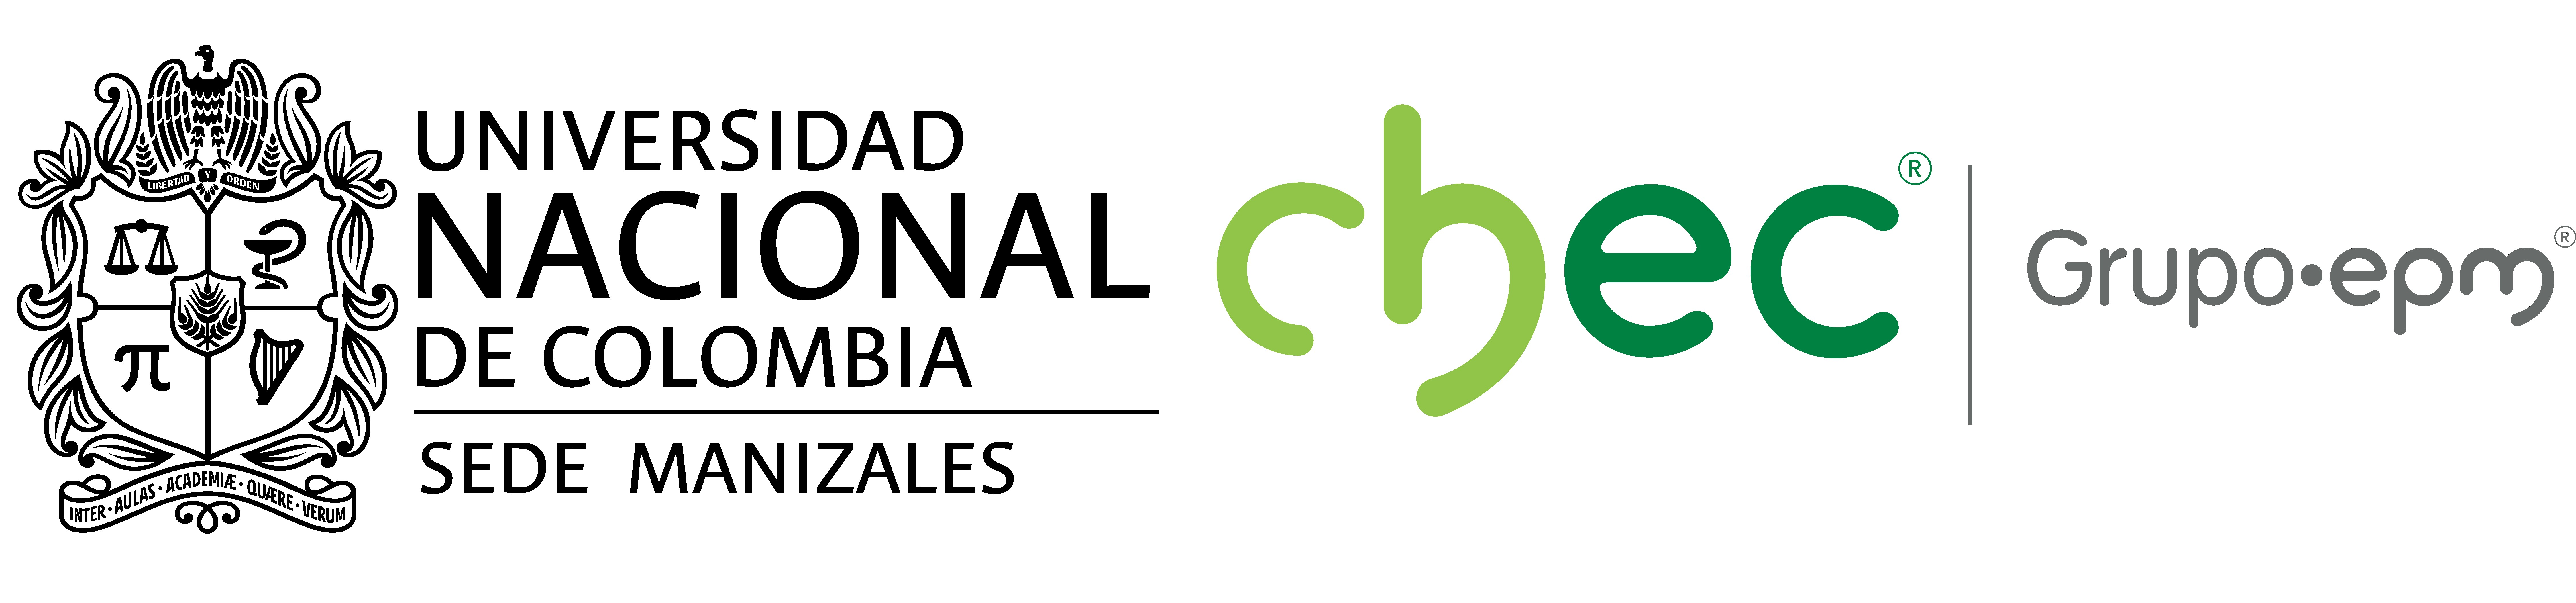

# **PROYECTO CIENCIA DE DATOS**
## ***Predicción de energía de transformadores de distribución en zona urbana***

## **Descripción**

Desarrollar e implementar un modelo generativo capaz de predecir la energía que podría consumir un transformador dependiendo de su ubicación, estrato, clientes, circuito y subestación en la zona urbana de Manizales.

### **Integrantes:**
* Astrid Vanesa Mina
* Pedro Jose Toro Chaves
* Alejandro Villegas Ruiz
* Ana María Gil Restrepo

# **1. Justificación**

En la actualidad, la proyección de demanda de energía para los transformadores de distribución es un proceso fundamental para garantizar un suministro eléctrico eficiente y adecuado. Sin embargo, la metodología utilizada por la empresa para calcular estas proyecciones es insuficiente y presenta múltiples limitaciones. El proceso es lento, consume una cantidad significativa de recursos y no tiene en cuenta una serie de variables clave que impactan de manera importante el consumo energético de los transformadores, tales como la ubicación geográfica, el estrato socioeconómico de los clientes, las características de los circuitos, y la interacción con las subestaciones cercanas.

La falta de una metodología precisa y eficiente para realizar las proyecciones genera problemas en la capacidad de respuesta ante picos de demanda, desajustes en la infraestructura y, en última instancia, afecta la calidad del servicio eléctrico brindado a los usuarios. Es relevante contar con un modelo predictivo avanzado que pueda integrar todos estos factores de manera efectiva para optimizar la estimación de la demanda energética y reducir costos asociados a sobrecargas o subutilización de los transformadores.


# **2. Problemática actual y base de datos:**

El proceso de cálculo de las proyecciones de demanda implemetado en CHEC hoy día no contempla todas las variables relevantes. Este sistema de predicción es tradicionalmente lento y laborioso, lo que provoca un desajuste entre la oferta y la demanda real de energía. Las proyecciones erróneas pueden resultar en subdimensionamiento o sobredimensionamiento de los transformadores, afectando tanto la eficiencia operativa como la calidad del servicio.

Además, las proyecciones no incluyen un análisis completo del comportamiento energético en diferentes estratos sociales, la ubicación de los transformadores, las características específicas de los circuitos y las interacciones con otras subestaciones, factores que inciden considerablemente en el consumo. La empresa también enfrenta una limitación al no poder prever con precisión el impacto de cambios en los patrones de consumo, como aquellos derivados de nuevos desarrollos urbanísticos o fluctuaciones en la demanda local.

**Solución Propuesta:**

El proyecto consiste en desarrollar e implementar un modelo generativo basado en técnicas de inteligencia artificial y aprendizaje automático, que será capaz de predecir el consumo energético de los transformadores de manera más precisa y eficiente. Este modelo integrará un conjunto de variables que impactan directamente en la demanda, tales como la ubicación geográfica de los transformadores, el estrato socioeconómico de los clientes, las características específicas de los circuitos, y la interacción con las subestaciones cercanas.

La solución propuesta implica el uso de datos históricos sobre consumo energético, junto con un análisis geoespacial de la zona urbana de Manizales, para generar predicciones más precisas y personalizadas.

Además de mejorar la exactitud de las proyecciones de demanda, este análisis contribuirá significativamente a una mejor planificación de la infraestructura eléctrica. Al integrar diversas variables relevantes, el modelo facilitará la toma de decisiones estratégicas sobre la expansión, el mantenimiento y la distribución de los transformadores y otros equipos críticos, adaptándose a las necesidades reales de la zona.

Con la implementación de este modelo, la empresa podrá realizar proyecciones más certeras y contar con herramientas más efectivas para el planeamiento a largo plazo, lo que garantizará una infraestructura eléctrica más robusta, eficiente y adecuada para satisfacer las crecientes necesidades energéticas de la comunidad. A su vez, se logrará una mayor fiabilidad en el servicio, contribuyendo al bienestar de los usuarios y al desarrollo sostenible de la ciudad.

## **2.1 Bases de datos**

*   Históricos de energía por transformador de distribución ---> (Formato parquet)
*   Tipificación de usuarios                         ---> (Formato xlsx)
*   Histórico de clientes por transformador          ---> (Formato parquet)


# **3. Organización y filtrado de datos:**

Se identifican las siguientos procesos:


*   Filtración e identificación de outliers para la base de datos de Históricos de energía por transformador
*   Consulta de base de datos ORACLE para conocer el histórico y ubicación de los tipos de clientes.
*   Creación de la columna "SUB" (Subestación)








**Inicialización**

Inicialización de kaggle para el manejo de las variables, importación de las librerías y enlace con github.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For -example, here's several helpful packages to load
import os

# Limitar JAX a un único hilo/dispositivo
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=1"
os.environ["JAX_PLATFORM_NAME"] = "cpu"  # Asegúrate de que usa CPU si no necesitas GPU.
import multiprocessing

if __name__ == "__main__":
    multiprocessing.set_start_method("spawn", force=True)
!pip install --upgrade jax jaxlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pytorch-tabnet --quiet
!pip install wget --quiet
!pip install pytorch-tabnet optuna
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetRegressor, TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
np.random.seed(0)
import os
import wget
from typing import Optional, Union, Tuple
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.metrics import accuracy_score
import pandas as pd
def get_labels(x: pd.Series) -> pd.Series:
    labels, _ = pd.factorize(x)
    return pd.Series(labels, name=x.name, index=x.index)
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
from pytorch_tabnet.augmentations import RegressionSMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from torchvision import datasets, transforms
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import filterfalse
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
import optuna
import warnings

# 1. Deshabilitar el logging de Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 2. Suprimir advertencias específicas
warnings.filterwarnings("ignore", category=UserWarning)  # Para advertencias de PyTorch TabNet o de otros módulos
warnings.filterwarnings("ignore", category=FutureWarning)  # Para advertencias futuras como 'suggest_loguniform'

def my_mse_loss_fn(y_pred, y_true):
    """
    Dummy example similar to using default torch.nn.functional.mse_loss
    """
    mse_loss = (y_true - y_pred) ** 2
    return torch.mean(mse_loss)
def my_rmse_loss_fn(y_pred, y_true):
    """
    Función de pérdida que calcula el RMSE entre la predicción y el valor verdadero.
    """
    mse_loss = (y_true - y_pred) ** 2
    mean_mse_loss = torch.mean(mse_loss)
    rmse_loss = torch.sqrt(mean_mse_loss)
    return rmse_loss
def my_mae_loss_fn(y_pred, y_true):
    """
    Calcula el error absoluto medio (Mean Absolute Error, MAE) entre las predicciones y los valores reales.
    Similar al uso de torch.nn.functional.l1_loss.
    """
    mae_loss = torch.abs(y_true - y_pred)
    return torch.mean(mae_loss)
def my_mape_loss_fn(y_pred, y_true):
    """
    Calcula el error porcentual absoluto medio (Mean Absolute Percentage Error, MAPE).
    """
    epsilon = 1e-8  # Evita divisiones por cero
    percentage_error = torch.abs((y_true - y_pred) / (y_true + epsilon))
    mape_loss = torch.mean(percentage_error) * 100
    return mape_loss

def my_r2_score_fn(y_pred, y_true):
    """
    Calcula el coeficiente de determinación R².
    """
    total_variance = torch.var(y_true, unbiased=False)  # Varianza total
    unexplained_variance = torch.mean((y_true - y_pred) ** 2)  # Varianza no explicada (MSE)
    r2_score = 1 - (unexplained_variance / total_variance)
    return 1-r2_score
def my_log_cosh_loss_fn(y_pred, y_true):
    """
    Calcula la pérdida log-cosh.
    """
    log_cosh_loss = torch.log(torch.cosh(y_true - y_pred))
    return torch.mean(log_cosh_loss)

def my_huber_loss_fn(y_pred, y_true, delta=1.0):
    """
    Calcula la pérdida Huber.
    """
    abs_error = torch.abs(y_true - y_pred)
    quadratic = torch.minimum(abs_error, torch.tensor(delta))
    linear = abs_error - quadratic
    huber_loss = 0.5 * quadratic ** 2 + delta * linear
    return torch.mean(huber_loss)

def my_msle_loss_fn(y_pred, y_true):
    """
    Calcula el error cuadrático medio logarítmico (MSLE).
    """
    epsilon = 1e-8  # Evita logaritmos de cero
    log_diff = torch.log1p(y_pred + epsilon) - torch.log1p(y_true + epsilon)
    msle_loss = torch.mean(log_diff ** 2)
    return msle_loss

import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetRegressor

class CustomTabNetRegressor(TabNetRegressor):
    def __init__(self, *args, **kwargs):
        super(CustomTabNetRegressor, self).__init__(*args, **kwargs)
        self.modified = False

    def fit(self, X_train, y_train, *args, **kwargs):
        super(CustomTabNetRegressor, self).fit(X_train, y_train, *args, **kwargs)
        if not self.modified:
            # Modificar la capa de salida para incluir ReLU
            original_forward = self.network.forward

            def modified_forward(inputs):
                # Obtener la salida original de la red
                output, M_loss = original_forward(inputs)
                # Aplicar ReLU a la salida
                output = torch.relu(output)
                return output, M_loss

            # Reemplazar el método forward de la red
            self.network.forward = modified_forward
            self.modified = True


In [3]:
!git clone https://github.com/alvillegasru/Proyeccion_Energia.git

fatal: destination path 'Proyeccion_Energia' already exists and is not an empty directory.


**Manipulación y filtrado de datos**

En esta etapa, se carga la información desde un archivo en formato .parquet, que contiene el histórico mensual de las mediciones de energía para el período comprendido entre enero de 2020 y septiembre de 2024. Este archivo abarca datos de todos los transformadores de CHEC, incluyendo la relación entre circuitos y transformadores.

Además, se agrega una columna denominada "SUB" para identificar la subestación correspondiente, y se realiza un filtrado para limitar los datos exclusivamente a las subestaciones ubicadas en Manizales.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#energias = pd.read_parquet('/kaggle/working/Proyeccion_Energia/Databases/DF_TRF.parquet')

energias= pd.read_parquet("/content/Proyeccion_Energia/Databases/DF_TRF.parquet")
energias = energias[energias['CTO'] != 'JTG23L12'].reset_index(drop=True)

energias['KWH_M'] = energias['KWH_M'].astype(float)
energias['SUB'] = energias['CTO'].str[:3]
energias_13_2 = energias[energias['CTO'].str[3:5]=='23']

energias_MAN = energias_13_2[energias_13_2['SUB'].isin(['MAN','PSO','CHI','ENE','AZA'])].reset_index(drop=True)

energias_ordenado = energias_MAN.sort_values(by=['ANIO','MES','CTO']).reset_index(drop=True)
energias_ordenado['FECHA']=pd.to_datetime(energias_ordenado['ANIO'].astype(str)+'-'+energias_ordenado['MES'].astype(str)+'-01',format='%Y-%m-%d')
energias_ordenado.drop(columns=['ANIO','MES','SUB'],inplace=True)

**Merged** para la unión de la información

En este punto, se carga la información histórica de clientes por transformador, la cual incluye datos relacionados con el transformador, el año, el mes y el número de clientes asociados a cada transformador durante los respectivos periodos.

Posteriormente, se realiza la integración de esta información con las coordenadas geográficas de cada transformador, así como con el histórico de mediciones de energía mencionado previamente. Esto permite consolidar una base de datos completa que incluye el tipo de cliente asociado a cada transformador.

In [6]:
#clientes = pd.read_parquet('/kaggle/working/Proyeccion_Energia/Databases/Crecimiento Poblacional/Cantidad de clientes promedio transformador.parquet')
clientes = pd.read_parquet('/content/Proyeccion_Energia/Databases/Crecimiento Poblacional/Cantidad de clientes promedio transformador.parquet')

clientes['PROMEDIO_CLIENTES']=np.ceil(clientes['PROMEDIO_CLIENTES']).astype(int)

clientes['FECHA']=pd.to_datetime(clientes['AÑO'].astype(str)+'-'+clientes['MES'].astype(str)+'-01',format='%Y-%m-%d')
clientes.drop(columns=['AÑO','MES'],inplace=True)

df_merged = pd.merge(energias_ordenado, clientes, left_on=['TF','FECHA','CTO'],right_on=['TPARENT','FECHA','FPARENT'], how='left')
df_merged.drop(columns=['TPARENT','FPARENT'],inplace=True)

#ubicacion= pd.read_csv('/kaggle/working/Proyeccion_Energia/Databases/Crecimiento Poblacional/Trafo_Estrato_Coordenada.csv',sep=';')
ubicacion= pd.read_csv('/content/Proyeccion_Energia/Databases/Crecimiento Poblacional/Trafo_Estrato_Coordenada.csv',sep=';')
ubicacion.drop(columns=['MAX_ESTRATO'],inplace=True)

df_merged2=pd.merge(df_merged,ubicacion,left_on=['TF','CTO'],right_on=['CODIGO','CIRCUITO'],how='left')
df_merged2.drop(columns=['CODIGO'],inplace=True)

df_no_duplicados = df_merged2.drop_duplicates(subset=['TF', 'CTO'])

df_merged2.dropna(inplace=True)

df_merged2['SUB'] = df_merged2['CIRCUITO'].str[:5]

if 'Bahia' in df_merged2.columns:
    df_merged2.drop(columns=['Bahia'], inplace=True)

target='KWH_M'

Xdata = df_merged2

Xdata["FECHA"]=Xdata["FECHA"].astype("int64") #Se hace el cambio de tipo de variable para el manejo de la fecha
Xdata.drop(['FECHA'],axis=1)



,TF,CTO,KWH_M,PROMEDIO_CLIENTES,CIRCUITO,COORD_X,COORD_Y,CUSTTYPE,SUB
0,M40001,AZA23L12,115008.0,108.0,AZA23L12,-75.486678,5.056624,CE,AZA23
1,M40002,AZA23L12,10583.0,15.0,AZA23L12,-75.487066,5.057463,CE,AZA23
2,M40005,AZA23L12,10480.0,2.0,AZA23L12,-75.485672,5.055221,OF,AZA23
3,M40006,AZA23L12,1365.0,5.0,AZA23L12,-75.490779,5.055460,OF,AZA23
4,M40009,AZA23L12,2328.0,6.0,AZA23L12,-75.486802,5.057413,CE,AZA23
...,...,...,...,...,...,...,...,...,...
171693,M55196,PSO23L20,22240.0,84.0,PSO23L20,-75.491264,5.067836,RS2,PSO23
171694,M55198,PSO23L20,19199.0,73.0,PSO23L20,-75.491265,5.067809,RS2,PSO23
171695,M55237,PSO23L20,20229.0,95.0,PSO23L20,-75.490454,5.068747,RS2,PSO23
171696,M55239,PSO23L20,19021.0,73.0,PSO23L20,-75.490448,5.067597,RS2,PSO23


**Label Encoder**

Se utiliza esta función para transformar los datos disponibles, comenzando con la identificación y separación de las columnas categóricas y numéricas.

* Para las columnas numéricas, los valores faltantes se reemplazan con tres veces el valor máximo de cada columna.
* Para las columnas categóricas, los valores faltantes se completan con el texto "NO APLICA".

Posteriormente, se aplica el Label Encoder a las columnas categóricas, asignando valores numéricos únicos a cada categoría. Esto facilita el procesamiento y análisis posterior de los datos al convertir las categorías en un formato apto para modelos de aprendizaje automático.
Esta transformación asegura la consistencia y manejabilidad de los datos para las siguientes etapas del análisis o modelado.

**Partición de los datos**

Se realiza la división de los datos para separar los conjuntos necesarios: uno para entrenar el modelo, otro para validarlo, y finalmente un conjunto de prueba para evaluar su desempeño final. Previamente, las características y la variable objetivo se preparan, identificando las categorías de la variable objetivo mediante percentiles para asegurar una distribución equilibrada en las divisiones. Además, los datos se escalan y categorizan cuando es necesario, utilizando técnicas como MinMaxScaler y estratificación, lo que garantiza una correcta representación de las proporciones de las categorías en los fragmentos de entrenamiento, validación y prueba.



In [7]:
#Uso de la función Label Encoder para la transformación de los datos categóricos y numéricos

y1 = Xdata[target].values.reshape(-1, 1)

Xdata.drop(target, axis=1, inplace=True)
df = Xdata.copy()

# Identificar columnas numéricas y categóricas
NUMERIC_COLUMNS = df.select_dtypes(include=['number']).columns.tolist()
CATEGORICAL_COLUMNS = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Rellenar valores faltantes
# Para numéricos: valor muy alto (3 veces el máximo de cada columna)
# Para categóricos: "no aplica"
for col in NUMERIC_COLUMNS:
    max_value = df[col].max()
    df[col].fillna(-10 * max_value, inplace=True)

for col in CATEGORICAL_COLUMNS:
    df[col].fillna("no aplica", inplace=True)

# Codificar variables categóricas y obtener sus dimensiones
categorical_dims = {}
for col in CATEGORICAL_COLUMNS:
    l_enc = LabelEncoder()
    df[col] = l_enc.fit_transform(df[col].astype(str))
    categorical_dims[col] = len(l_enc.classes_)

# Crear lista de características
unused_feat = []
features = [col for col in df.columns if col not in unused_feat + [target]]

# Obtener índices y dimensiones de variables categóricas


# Preparar datos
X = df[features].values.astype('float32')
y = y1.astype('float32')
percentiles = np.percentile(y, [33.33, 66.66])  # Divisiones en tercios
y_categorized = np.digitize(y[:,0:1].flatten(), bins=percentiles).astype(int)

# Escalar la variable objetivo
scaler =  MinMaxScaler()
y_scaled = scaler.fit_transform(y)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42,stratify=y_categorized)
percentiles = np.percentile(y, [33.33, 66.66])  # Divisiones en tercios
y_categorized_t = np.digitize(y_train[:,0:1].flatten(), bins=percentiles).astype(int)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42,stratify=y_categorized_t)

In [8]:
cat_idxs = [i for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
cat_dims = [categorical_dims[f] for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
cat_emb_dim = [min(4, (dim + 1) // 2) for dim in cat_dims]
print(cat_idxs,cat_dims,cat_emb_dim,)

[0, 1, 4, 7, 8] [2982, 32, 32, 18, 5] [4, 4, 4, 4, 3]


 # **4. Hoja de ruta y algoritmo empleado:**


El modelo seleccionado es **TableNet** que corresponde a un método de aprendizaje profundo diseñado originalmente para identificar y extraer tablas de documentos como PDF o imágenes escaneadas. Sin embargo, este modelo también puede aplicarse directamente sobre tablas definidas, lo que lo hace versátil para diversas tareas, incluyendo la regresión.

Cuando se utiliza para regresión, TableNet ajusta su arquitectura para predecir valores continuos, aprovechando su capacidad para analizar la estructura visual y el contenido numérico de las tablas. Esto lo convierte en una herramienta robusta para problemas que requieren la combinación de características espaciales y semánticas.

Características clave del modelo:
* Especialización tabular: Diseñado para comprender estructuras tabulares, lo que asegura un análisis preciso incluso en tablas complejas.
* Adaptabilidad: Su arquitectura permite abordar tareas de regresión con ligeras modificaciones, manteniendo su rendimiento y precisión.
* Capacidad de aprendizaje visual y estructural: Combina redes convolucionales para identificar patrones tanto en la disposición como en el contenido de las tablas.

**Configuración del modelo para regresión:**

Para implementar TableNet en una tarea de regresión, se consideran los siguientes ajustes:
* Función de pérdida: Se utiliza una función adecuada para regresión, que es el error absoluto medio (MAE).
* Hiperparámetros clave:
   - Tasa de aprendizaje: Controla la velocidad de ajuste de los pesos del modelo.
   - Tamaño del lote (batch size): Define cuántas muestras se procesan simultáneamente durante el entrenamiento.
   - Número de filtros en las capas convolucionales: Ajusta la capacidad del modelo para aprender características relevantes.
   - Dropout: Se emplea para prevenir el sobreajuste.
Número de épocas: Determina la cantidad de iteraciones completas sobre el conjunto de entrenamiento.

**Optimización de hiperparámetros para el modelo TabNetRegressor**


En el proceso de optimización de hiperparámetros, se configuraron diferentes optimizadores como Adam, SGD y RMSprop, seleccionados dinámicamente según los parámetros sugeridos, ajustando valores como la tasa de aprendizaje, peso de decaimiento y momento. El modelo TabNetRegressor se entrenó utilizando los conjuntos de datos de entrenamiento y validación, evaluando su desempeño con la métrica MAE (Mean Absolute Error) y una función personalizada para evaluar la pérdida, implementando un mecanismo de paciencia que detiene el entrenamiento si no hay mejoras en 40 épocas consecutivas. Al finalizar cada prueba, la métrica MAE se utilizó como criterio para determinar la calidad del modelo, optimizando este valor a lo largo del proceso . Para ello, se creó un estudio con Optuna, empleando el muestreador TPESampler, que realiza búsquedas eficientes en el espacio de hiperparámetros definidos, explorando distintas combinaciones a lo largo de 10 iteraciones. Finalmente, los mejores hiperparámetros se obtuvieron con base en el MAE mínimo alcanzado, consolidando los resultados para determinar la configuración más eficiente .

In [ ]:
# def objective_regression(trial):
#     # Hiperparámetros ajustados
#     n_d = trial.suggest_int('n_d', 8, 128)
#     n_a = trial.suggest_int('n_a', 8, 128)
#     n_steps = trial.suggest_int('n_steps', 3, 10)
#     gamma = trial.suggest_loguniform('gamma', 1e-2, 10.0)
#     lambda_sparse = trial.suggest_loguniform('lambda_sparse', 1e-5, 1e-2)
#     batch_size = trial.suggest_categorical('batch_size', [256, 512])
#     mask_type = trial.suggest_categorical('mask_type', ['entmax', 'sparsemax'])
#     emb = trial.suggest_int('emb', 3, 10)

#     momentum = trial.suggest_float('momentum', 0.1, 0.9)
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
#     weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)
#     scheduler_gamma = trial.suggest_float('scheduler_gamma', 0.7, 0.95)
#     step_size = trial.suggest_int('step_size', 5, 15)
#     virtual_batch_size = trial.suggest_categorical('virtual_batch_size', [64, 128])

#     optimizer_type = trial.suggest_categorical('optimizer_type', ['adam', 'sgd', 'rmsprop'])

#     # Configurar optimizador
#     if optimizer_type == 'adam':
#         optimizer_fn = torch.optim.Adam
#         optimizer_params = {'lr': learning_rate, 'weight_decay': weight_decay}
#     elif optimizer_type == 'sgd':
#         optimizer_fn = torch.optim.SGD
#         optimizer_params = {'lr': learning_rate, 'momentum': momentum, 'weight_decay': weight_decay}
#     elif optimizer_type == 'rmsprop':
#         optimizer_fn = torch.optim.RMSprop
#         optimizer_params = {'lr': learning_rate, 'momentum': momentum, 'weight_decay': weight_decay}

#     # Incorporar valores categóricos
#     cat_idxs = [i for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
#     cat_dims = [categorical_dims[f] for f in features if f in CATEGORICAL_COLUMNS]
#     cat_emb_dim = [min(emb, (dim + 1) // 2) for dim in cat_dims]

#     # Augmentations
#     p = trial.suggest_float('p', 0.1, 0.9)
#     aug = RegressionSMOTE(p=p)

#     # Crear modelo TabNet
#     model = TabNetRegressor(
#         cat_dims=cat_dims,
#         cat_emb_dim=cat_emb_dim,
#         cat_idxs=cat_idxs,
#         n_d=n_d,
#         n_a=n_a,
#         n_steps=n_steps,
#         gamma=gamma,
#         lambda_sparse=lambda_sparse,
#         mask_type=mask_type,
#         optimizer_fn=optimizer_fn,
#         optimizer_params=optimizer_params,
#         scheduler_params={"gamma": scheduler_gamma, "step_size": step_size},
#         scheduler_fn=torch.optim.lr_scheduler.StepLR,
#         verbose=False,
#     )

#     # Entrenar el modelo
#     model.fit(
#         X_train=X_train,
#         y_train=y_train,
#         eval_set=[(X_train, y_train), (X_valid, y_valid)],
#         eval_name=['train', 'valid'],
#         eval_metric=['mae'],
#         loss_fn=my_r2_score_fn,
#         max_epochs=50,
#         patience=40,
#         batch_size=batch_size,
#         virtual_batch_size=virtual_batch_size,
#         num_workers=1,
#         drop_last=False,
#         augmentations=aug,
#     )

#     # Evaluación
#     mae = model.history['loss'][-1]
#     return mae

# # Crear el estudio
# study_class = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler())
# study_class.optimize(objective_regression, n_trials=10)

# # Resultados
# print("Best hyperparameters for regression: ", study_class.best_params)
# print("Best mae: ", study_class.best_value)


In [9]:
#Hiperparametros obtenidos

hip= {'n_d': 36, 'n_a': 26, 'n_steps': 9, 'gamma': 0.036821698755764784, 'lambda_sparse': 1.9211354881041664e-05, 'batch_size': 512, 'mask_type': 'sparsemax', 'emb': 9, 'momentum': 0.30846861891333355, 'learning_rate': 0.002056760319661826, 'weight_decay': 2.4601333519135903e-05, 'scheduler_gamma': 0.7634440567538022, 'step_size': 14, 'virtual_batch_size': 64, 'optimizer_type': 'rmsprop', 'p': 0.19153546053382878}

**Utilización de los mejores parametros obtenidos**


Este bloque de código implementa el modelo **TabNetRegressor** utilizando los hiperparámetros óptimos obtenidos previamente y almacenados en la variables **hip**. Los parámetros son asignados a variables específicas para configurar el modelo, incluyendo aspectos como la arquitectura de TabNet (`n_d`, `n_a`, `n_steps`), la regularización (`lambda_sparse`), y el tipo de optimizador a usar (`adam`, `adamw`, `sgd`, o `rmsprop`). Además, se define una técnica de aumento de datos, `RegressionSMOTE`, para mejorar el balance en la distribución de las clases de la variable objetivo.

El modelo TabNetRegressor se entrena iterativamente, con configuraciones avanzadas como programadores de tasa de aprendizaje (`StepLR`) y paciencia para detener el entrenamiento si no hay mejoras significativas. Durante cada iteración, se ajusta la hiperparámetro `lambda_sparse` para evaluar su efecto sobre la calidad del modelo. Finalmente, los resultados del modelo se almacenan, incluyendo las máscaras de atención generadas y las matrices de explicación, las cuales proporcionan información sobre la importancia de las características utilizadas en las predicciones. Estos resultados se guardan en archivos para análisis posterior, completando así un proceso detallado y exhaustivo de entrenamiento y evaluación del modelo.




In [ ]:
# Parámetros obtenidos del estudio
best_params =  hip

# Asignación de parámetros
n_d = best_params['n_d']
n_a = best_params['n_a']
n_steps = best_params['n_steps']
gamma = best_params['gamma']
lambda_sparse = best_params['lambda_sparse']
mask_type = best_params['mask_type']
batch_size = best_params['batch_size']
emb = best_params['emb']
p = best_params['p']
momentum = best_params['momentum']
learning_rate = best_params['learning_rate']
weight_decay = best_params['weight_decay']
scheduler_gamma = best_params['scheduler_gamma']
step_size = best_params['step_size']
virtual_batch_size = best_params['virtual_batch_size']
optimizer_type = best_params['optimizer_type']

if optimizer_type == 'adam':
    optimizer_fn = torch.optim.Adam
    optimizer_params = {'lr': learning_rate, 'weight_decay': weight_decay}
elif optimizer_type == 'adamw':
    optimizer_fn = torch.optim.AdamW
    optimizer_params = {'lr': learning_rate, 'weight_decay': weight_decay}
elif optimizer_type == 'sgd':
    optimizer_fn = torch.optim.SGD
    optimizer_params = {'lr': learning_rate, 'momentum': momentum, 'weight_decay': weight_decay}
elif optimizer_type == 'rmsprop':
    optimizer_fn = torch.optim.RMSprop
    optimizer_params = {'lr': learning_rate, 'momentum': momentum, 'weight_decay': weight_decay}

# Definición de la técnica de aumento de datos
aug = RegressionSMOTE(p=p)

# Identificación de columnas categóricas y sus dimensiones
cat_idxs = [i for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
cat_dims = [categorical_dims[f] for f in features if f in CATEGORICAL_COLUMNS]
cat_emb_dim = [min(emb, (dim + 1) // 2) for dim in cat_dims]
import torch
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Valores de lambda_sparse para iterar
lambda_values = [lambda_sparse]

# Listas para guardar las máscaras y matrices de explicación de cada iteración
all_masks = []
all_explain_matrices = []

for iteration, lambda_sparse in enumerate(lambda_values):
    print(f"Iteración {iteration + 1}, lambda_sparse={lambda_sparse}")

    # Inicialización del modelo TabNetRegressor
    clf = TabNetRegressor(
        cat_dims=cat_dims,
        cat_emb_dim=cat_emb_dim,
        cat_idxs=cat_idxs,
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        mask_type=mask_type,
        optimizer_fn=optimizer_fn,
        optimizer_params=optimizer_params,
        scheduler_params={"gamma": scheduler_gamma, "step_size": step_size},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        momentum=momentum,
        verbose=True
    )

    # Entrenar el modelo
    clf.fit(
        X_train=X_train,
        y_train=y_train[:,0:1],
        eval_set=[(X_train, y_train[:,0:1]), (X_valid, y_valid[:,0:1])],
        eval_name=['train', 'valid'],
        eval_metric=['mae'],
        loss_fn=my_r2_score_fn,
        max_epochs=200,
        patience=60,
        batch_size=batch_size,
        virtual_batch_size=virtual_batch_size,
        num_workers=0,
        drop_last=False,
        augmentations=aug,
    )

#     # Generar explicación
#     explain_matrix, masks = clf.explain(X, normalize=True)

#     # Guardar resultados
#     all_masks.append(np.array([masks[i] for i in range(n_steps)]))  # Guardar las máscaras
#     all_explain_matrices.append(explain_matrix)  # Guardar explain_matrix como array de NumPy
# savepath='/kaggle/working/'
# # Guardar las máscaras y matrices de explicación en archivos
# for i, (masks, explain_matrix) in enumerate(zip(all_masks, all_explain_matrices)):
#     # Guardar las máscaras como un archivo numpy
#     np.save(f"{savepath}masks_iteration_{i+1}.npy", masks, allow_pickle=True)
#     # Guardar la matriz de explicación como un archivo numpy
#     np.save(f"{savepath}explain_matrix_iteration_{i+1}.npy", explain_matrix,allow_pickle=True)

# print("¡Proceso completo! Las máscaras y matrices de explicación se han guardado correctamente.")

**Guardado del modelo**

Se guarda el modelo en una carpeta para su posterior uso

In [2]:
import joblib

output_folder = '/kaggle/working/modelo_guardado'
os.makedirs(output_folder, exist_ok=True)

joblib.dump(clf, f'{output_folder}/modelo_energias.pkl')

NameError: name 'os' is not defined

# **Cargar el modelo entrenado**

In [10]:
import joblib

clf= joblib.load("/content/Proyeccion_Energia/modelo_energias.pkl")

**Cálculo y visualización del R2**

En este punto se calcula el indicador numérico de rendimiento R2 y también se utiliza la visualización para evaluar cómo las predicciones del modelo se distribuyen con respecto a los valores reales, lo que es útil para identificar tendencias, sesgos o errores sistemáticos en las predicciones.

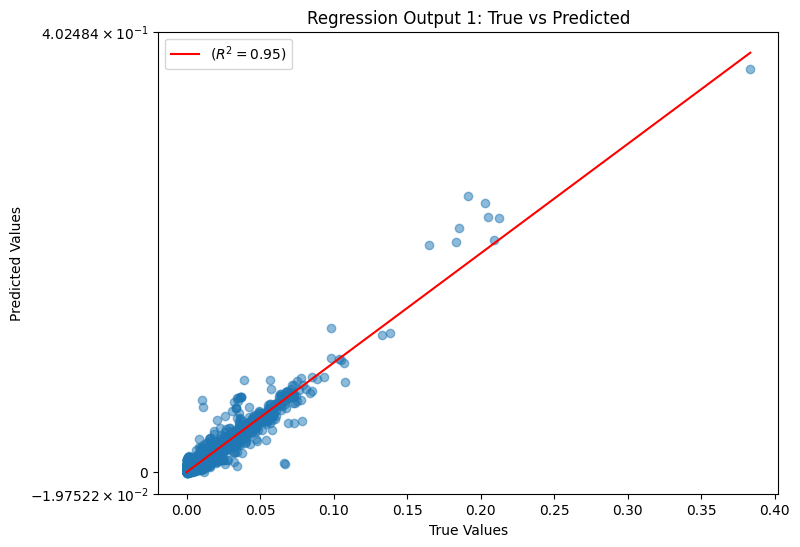

In [11]:
from sklearn.metrics import r2_score

y_pred=clf.predict(X_test)
# Calcular el R2
r2 = r2_score(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Output 1: True vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', label=f'($R^2={r2:.2f}$)')
# Mostrar leyenda y gráfico
plt.yscale('symlog')
plt.legend()
plt.show()

**Visualización de las máscaras**

En este punto se visualiza las máscaras de atención generadas por el modelo TabNet durante cada paso de decisión, mostrando cómo se seleccionan y ponderan las características en cada iteración. Cada máscara se representa en un subgráfico, donde los colores indican la intensidad con la que el modelo utiliza cada característica para las predicciones, normalizados entre los valores mínimo y máximo encontrados. Se utiliza un mapa de colores uniforme para garantizar consistencia entre las máscaras, y se añade una barra de colores compartida que explica el significado de los valores. Esta visualización es fundamental para analizar la interpretabilidad del modelo, permitiendo identificar las características más relevantes para el proceso de decisión en cada paso.

In [12]:
explain_matrix, masks = clf.explain(X, normalize=True)

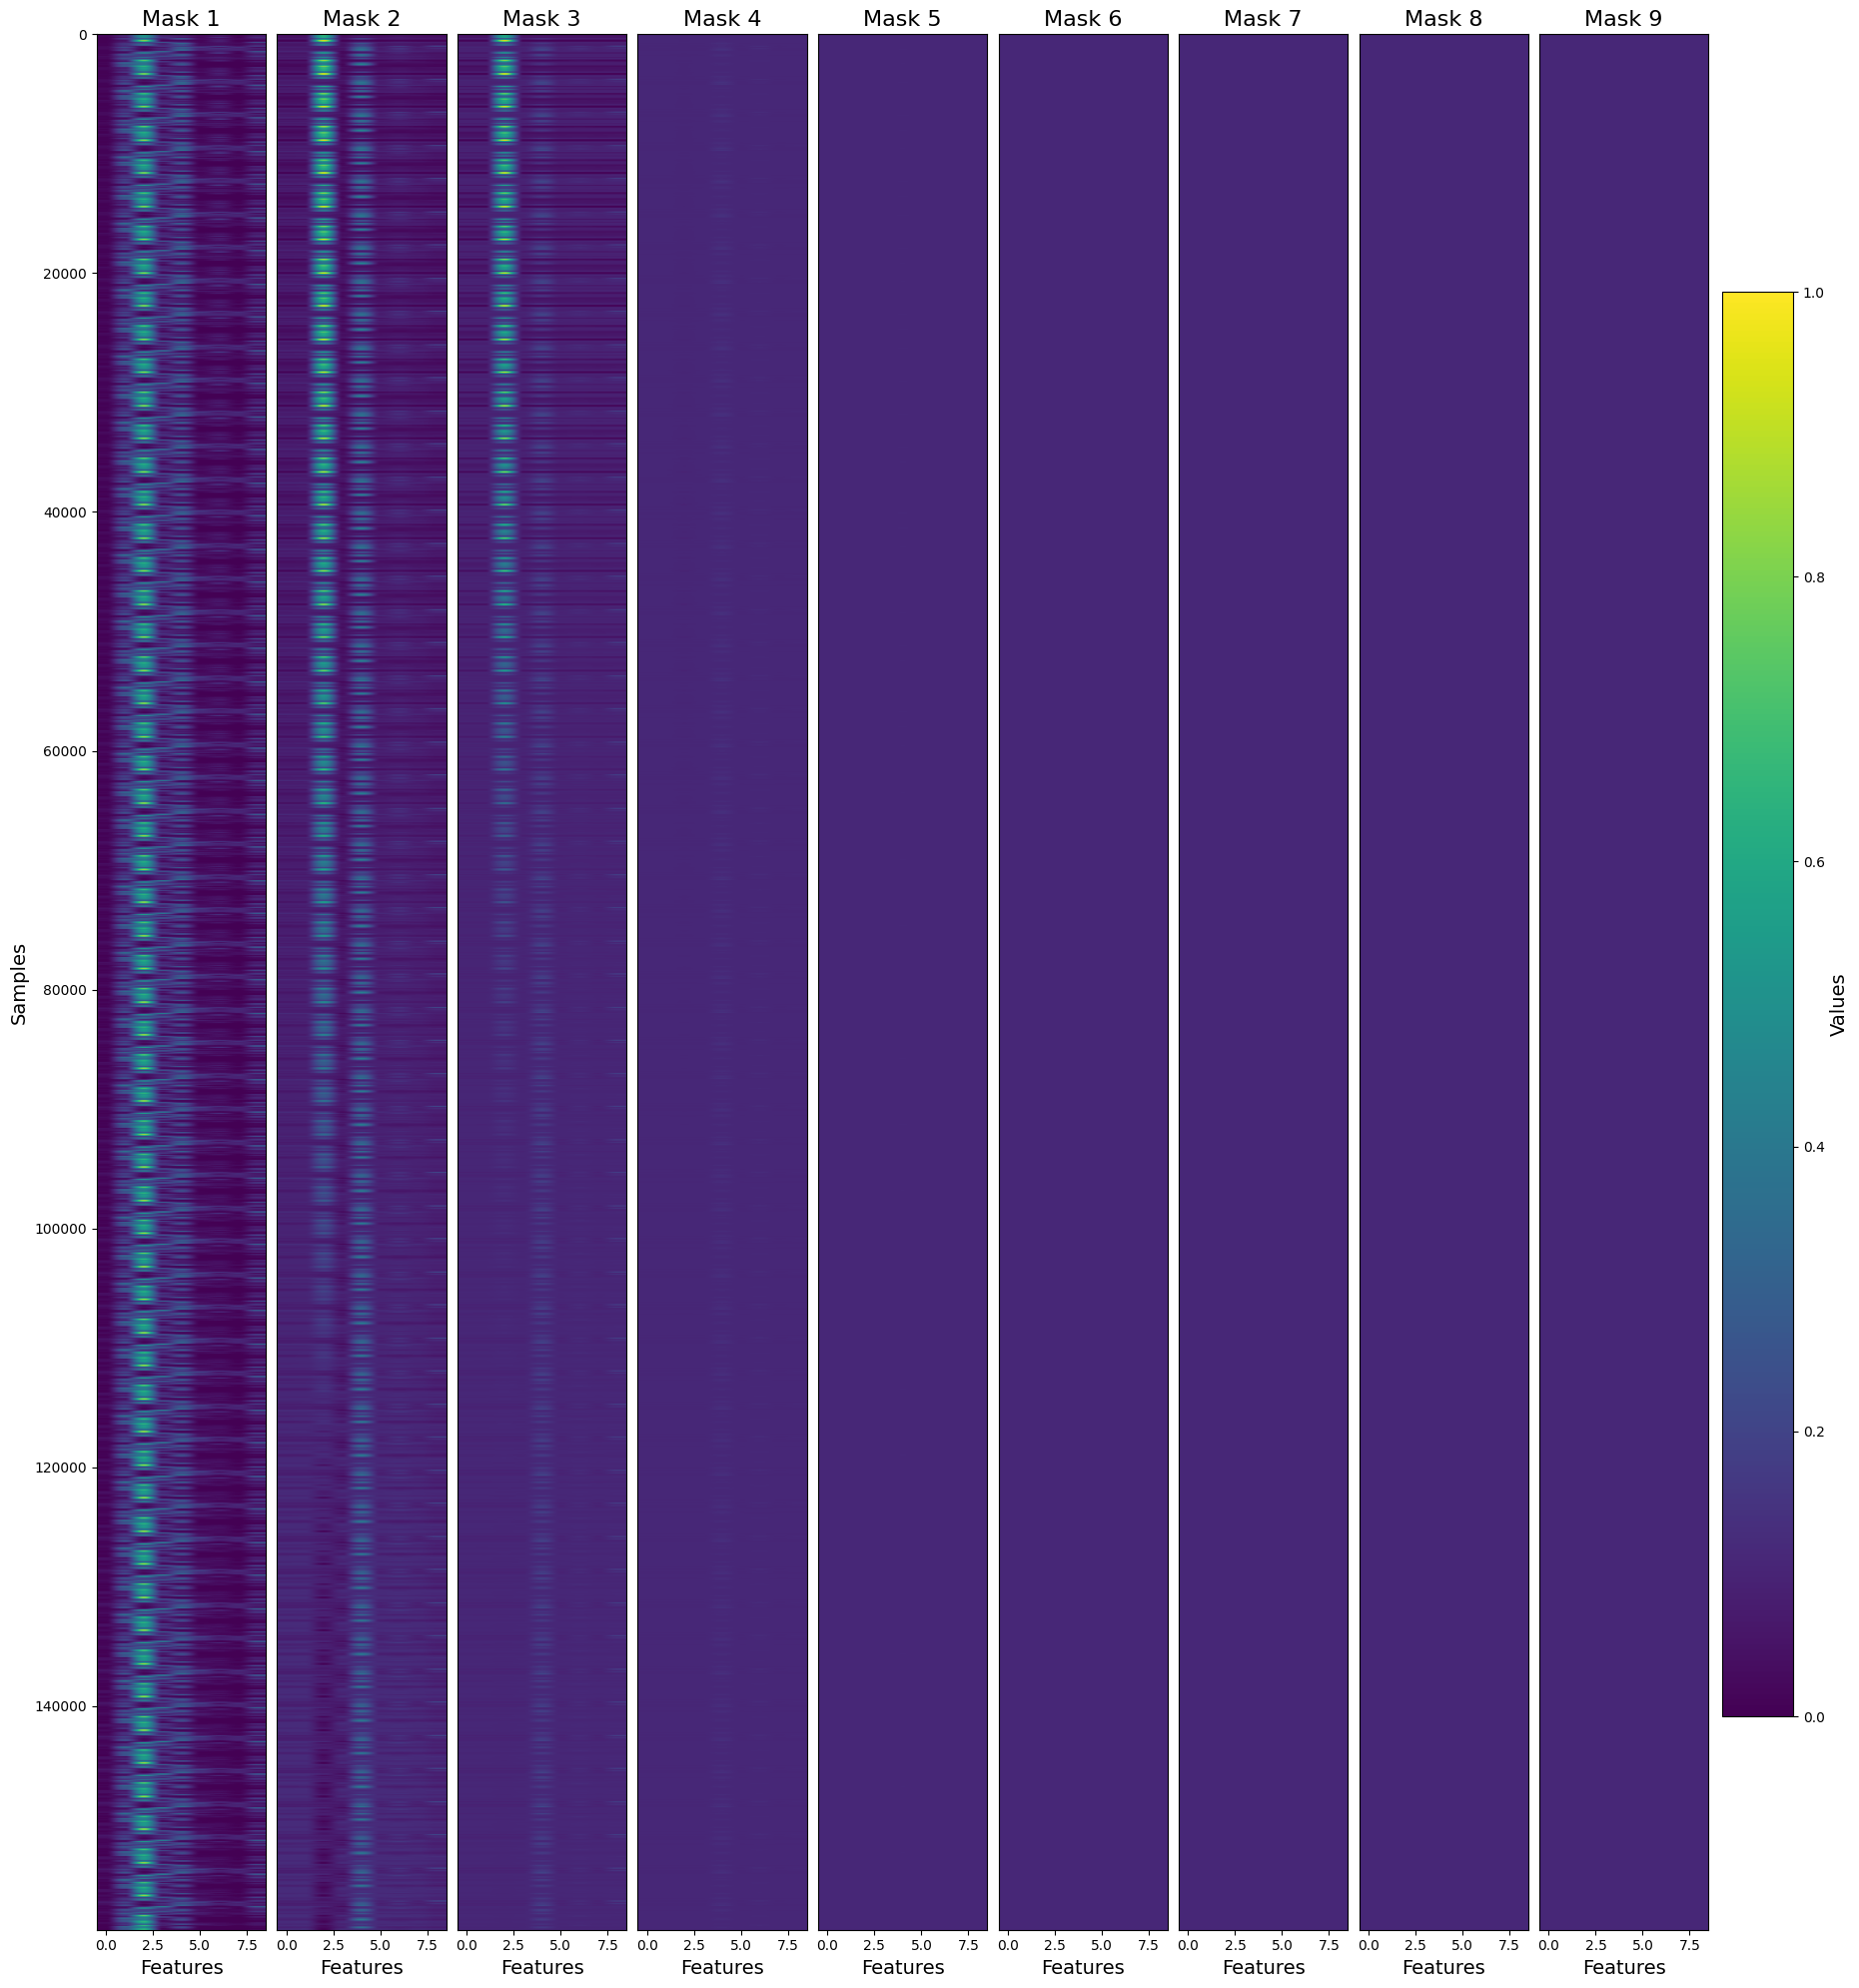

In [15]:
n_steps = hip['n_steps']
min_val = np.min([np.min(masks[i]) for i in range(n_steps)])
max_val = np.max([np.max(masks[i]) for i in range(n_steps)])
fig, axs = plt.subplots(1, n_steps, figsize=(20,20))
# Iteración para mostrar cada máscara
for i in range(n_steps):
    im = axs[i].imshow(masks[i], aspect='auto', cmap='viridis', vmin=min_val, vmax=max_val)
    axs[i].set_title(f"Mask {i + 1}", fontsize=16)
    axs[i].set_xlabel("Features", fontsize=14)
    if i == 0:  # Solo mostrar ejes en la primera subfigura
        axs[i].set_ylabel("Samples", fontsize=14)
    else:
        axs[i].set_yticks([])
# Añadir un único colorbar para toda la figura al final
cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.046, pad=-0.22)
cbar.set_label("Values", fontsize=14)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Global Feature Importances'}>

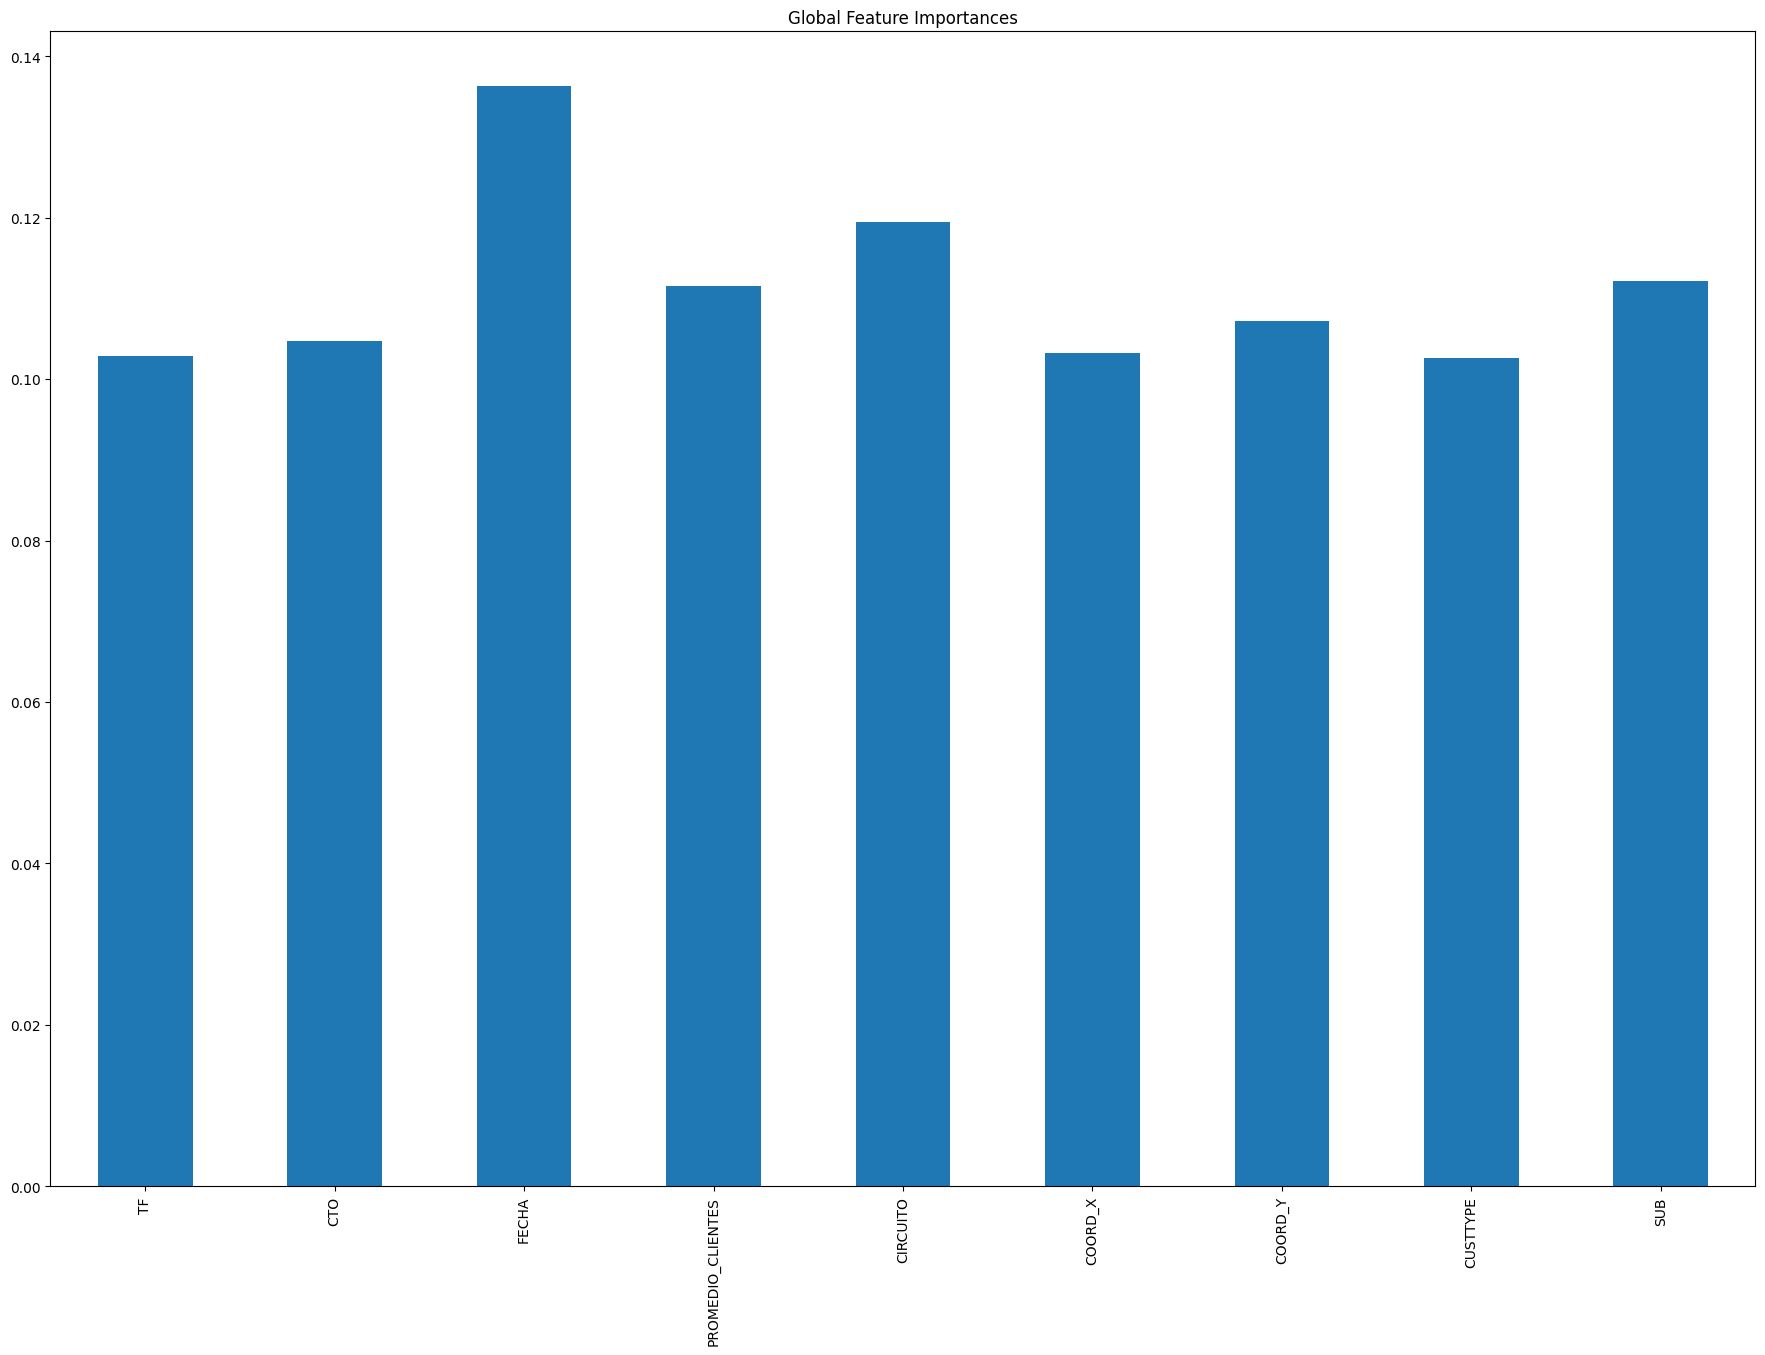

In [16]:
plt.figure(figsize=(22, 15))
pd.Series(clf.feature_importances_, index=df.columns).plot.bar(title='Global Feature Importances')


# **5. Conclusiones y trabajo futuro:**

* La intención detrás del desarrollo de este proyecto era realizar una proyección espacial de la demanda utilizando variables clave como el crecimiento poblacional, la temperatura, los datos de zonas de expansión y los usos del suelo del Plan de Ordenamiento Territorial, así como la energía por transformador de distribución y la estratificación de clientes. Sin embargo, no fue posible incluir variables como la temperatura, el crecimiento poblacional y los usos del suelo en el modelo de predicción, ya que la información correspondiente a estas variables no estaba disponible en formato electrónico o no se encontraba alineada temporalmente con los datos de energía por transformador, los cuales sí fueron obtenidos para el análisis. Debido a esta limitación, las mencionadas variables no pudieron ser incorporadas en el modelo de regresión utilizado en este estudio. Esperamos poder incluirlas en un trabajo futuro.

* Durante la exploración de la información hemos encontrado que obtener la proyección espacial de potencia implica tener la curva de caracterización actualizada por cliente y la medición horaria por transformador de distribución, información que a la fecha no disponemos. Por lo tanto, se define que se realizará únicamente la proyección espacial de la energía. Dejando como trabajo futuro el desarrollo para la proyección espacial de la potencia.

* Es fundamental iterar sobre la optimización de la búsqueda de hiperparámetros para identificar las características que permitan desarrollar un modelo TableNet con un rendimiento óptimo, basado en un proceso de entrenamiento adecuado. En este proyecto se utilizaron 50 *epoch* y 10 *trials* teniendo en cuenta el límite de entorno gratuito de kaggle.

* Una vez asegurado un proceso de optimización efectivo (realizando pruebas con diferentes cantidades de épocas, tanto extensas como reducidas), se observa una mejora significativa en el valor del coeficiente R², alcanzando un nivel de 0.95 entrenando el modelo con 200 *epoch*. Este resultado indica que el modelo explica el 95% de la variabilidad en los datos, esto sugiere que el modelo tiene un excelente desempeño en términos de precisión y capacidad predictiva dentro del contexto de los datos evaluados.


* El modelo combina múltiples ventajas que lo hacen una solución altamente efectiva para el manejo de datos tabulares. Destaca por su capacidad de proporcionar interpretabilidad, al ofrecer una evaluación intuitiva de la importancia de las características. Su integración del poder de las redes neuronales y los árboles de decisión asegura un manejo eficiente de datos tabulares, mientras que su arquitectura de atención permite un entrenamiento rápido y enfocado en las características más relevantes. Además, su desempeño sólido sin necesidad de preprocesamiento complejo, como la normalización o el escalado de variables, lo convierte en una herramienta práctica y versátil para una amplia variedad de aplicaciones.

* El gráfico de importancia de características globales indica que todas las variables ingresadas en el modelo de predicción tienen un aporte significativo al análisis y son relevantes para predecir los datos. Esto sugiere que cada una de las variables proporciona información valiosa para el modelo, contribuyendo de manera uniforme o destacada en el desempeño predictivo.





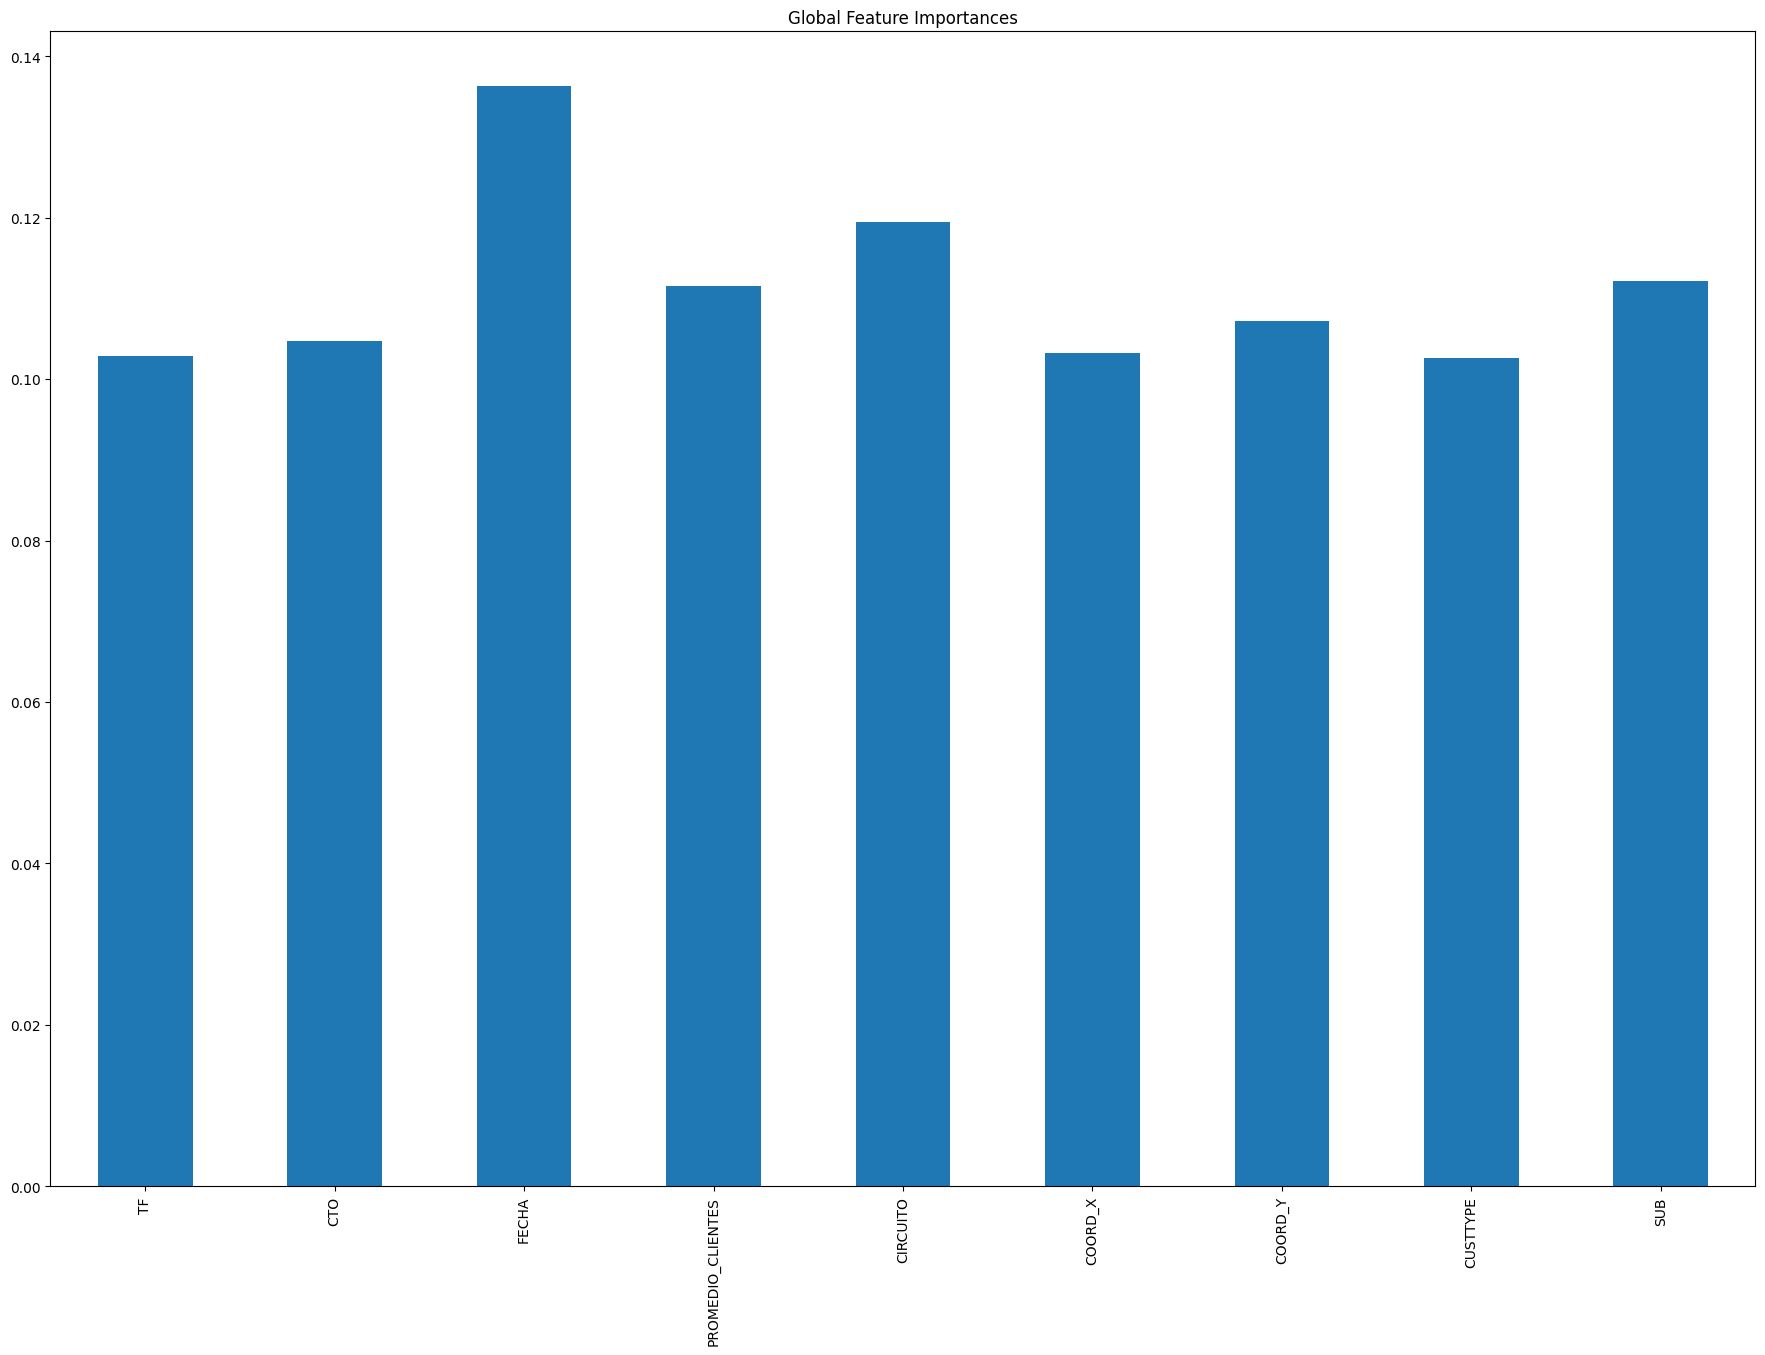